<a href="https://colab.research.google.com/github/sruthireddy1482/CE888/blob/main/LAB3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")


In [ ]:
len(df)

41188

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

drop duration column

In [ ]:
df.drop('duration', inplace=True, axis=1)

label encode only the target columns which is y 

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y']= label_encoder.fit_transform(df['y'])
df['y'].unique()

array([0, 1], dtype=int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null int32
dtypes: float64(5), int32(1), int64(4), object(10)
memory usage: 6.1+ MB


In [ ]:
features = ["age", "job", "marital", "education", "default", "housing", "loan",
       "contact", "month", "day_of_week", "campaign", "pdays",
       "previous", "poutcome", "emp.var.rate", "cons.price.idx",
       "cons.conf.idx", "euribor3m", "nr.employed"]


df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [ ]:
df_dummies_features = pd.get_dummies(df[features])

In [ ]:
df_dummies_features.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
len(df_dummies_features.columns)

62

In [ ]:
df_dummies_features.columns.values

array(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_

In [ ]:
df_dummies_features.dropna(axis=0,inplace=True)

In [ ]:
len(df_dummies_features)

41188

In [ ]:
df_dummies_features.isnull().sum()

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 62, dtype: int64

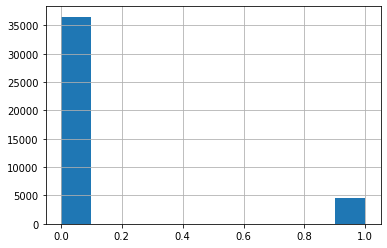

In [ ]:
df['y'].hist()

calculating imbalance in the target variable

In [ ]:
class_count_0, class_count_1 = df['y'].value_counts()
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (36548, 20)
class 1: (4640, 20)


In [ ]:
import imblearn
import collections
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
X=df_dummies_features
Y=df['y']

MODELLING THE DATA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50, stratify=Y)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(max_depth=12,n_estimators=300,random_state=60)
model.fit(X_train,y_train)
model_predict=model.predict(X_test)

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
euribor3m,1.377798e-01
nr.employed,1.169273e-01
pdays,7.401744e-02
poutcome_success,6.978387e-02
emp.var.rate,6.136299e-02
...,...
job_unknown,2.203605e-03
month_dec,1.723313e-03
marital_unknown,8.043855e-04
education_illiterate,2.939633e-04


In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, model_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, model_predict))
print('\n')

=== Confusion Matrix ===
[[7180  130]
 [ 685  243]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.65      0.26      0.37       928

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238





In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.899 (0.002)


Training dummy classifier

In [ ]:
dumm_clf = DummyClassifier(strategy='stratified')
dumm_clf.fit(X, Y)
print("Dummy ACC: %.2f" % acc(Y, dumm_clf.predict(X)))

Dummy ACC: 0.80


grid search cv on random forest classifier

In [ ]:
param_grid = { 
    'n_estimators': [100, 200,300],
    'max_depth' : [5,7,9,11],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}


In [ ]:
from sklearn.model_selection import GridSearchCV
model1=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=model1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'auto',
 'n_estimators': 300}

In [ ]:
from sklearn.metrics import accuracy_score
pred=CV_rfc.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9013109978150037


In [ ]:
y_error = ((y_test - pred)**2).mean()
y_error

0.09868900218499636